In [1]:
import pandas as pd
import os
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a_path = '../../data/method_outputs/w8_global_convex/A.txt'
b_path = '../../data/method_outputs/w8_global_convex/B.txt'

In [3]:
a_data = pd.read_csv(a_path, header = None)
b_data = pd.read_csv(b_path, header = None)

In [4]:
a_data[0] = a_data[0].str.replace('[', '').replace("'", '')
a_data[100] = a_data[100].str.replace(']', '').replace("'", '').replace(' ', '')

In [20]:
best = a_data.values[a_data[0].idxmin()]
best_val = int(best[0])
best_nodes = list(best[1:])
best_val

72229

In [21]:
a_sum = []
for i in a_data.values:
    line = [int(i[0])]
    if int(i[0])==72229:
        line.append(0)
        line.append(0)
    else:
        line.append(len(list(set(i[1:]).intersection(best_nodes))))
        morphed1 = [(i[a], i[a+1]) for a in range(1, 99)]
        morphed1.append((i[100], i[1]))
        morphed2 = [(best_nodes[a], best_nodes[a+1]) for a in range(0, 98)]
        morphed2.append((best_nodes[99], best_nodes[0]))
        ful_sum = len(list(set(morphed1).intersection(morphed2)))
        morphed3 = [(i[a+1], i[a]) for a in range(1, 99)]
        morphed3.append((i[1], i[100]))
        ful_sum+= len(list(set(morphed3).intersection(morphed2)))
        line.append(ful_sum)
    sim_nodes = []
    sim_edges = []
    for j in a_data.values:
        if np.all(i!=j):
            sim_nodes.append(len(list(set(i[1:]).intersection(j[1:]))))
            morphed2 = [(j[a], j[a+1]) for a in range(1, 99)]
            morphed2.append((j[100], j[1]))
            part_sum = len(list(set(morphed1).intersection(morphed2))) + len(list(set(morphed3).intersection(morphed2)))
            sim_edges.append(part_sum)
    
    line.append(round(statistics.mean(sim_nodes)))
    line.append(round(statistics.mean(sim_edges)))
    a_sum.append(line)
            


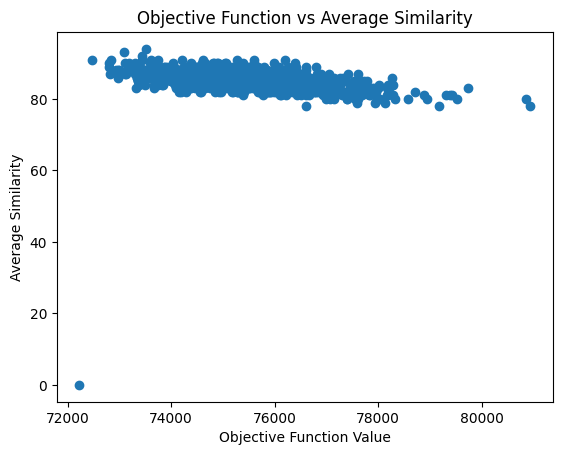

In [22]:
objective_values = [int(a[0]) for a in a_sum]
similarity_values = [a[1] for a in a_sum]

# Calculate unique objective function values and average similarity
unique_objectives = np.unique(objective_values)
average_similarities = [
    np.mean([x[1] for x in a_sum if x[0] == obj ]) for obj in unique_objectives
]

# Create the plot
#plt.figure(figsize=(8, 6))
plt.scatter(objective_values, similarity_values)
plt.title("Objective Function vs Average Similarity")
plt.xlabel("Objective Function Value")
plt.ylabel("Average Similarity")
plt.show()


In [23]:
def correlation_coefficient(x_values, y_values):
    if len(x_values) != len(y_values):
        return "The lists are not of the same length."
    n = len(x_values)
    sum_x = sum(x_values)
    sum_y = sum(y_values)
    sum_x2 = sum(x**2 for x in x_values)
    sum_y2 = sum(y**2 for y in y_values)
    sum_xy = sum(x*y for x, y in zip(x_values, y_values))

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))**0.5

    if denominator == 0:
        return "Division by zero error in calculation."
    
    return round(numerator / denominator, 2)

In [24]:
a_df = pd.DataFrame(a_sum)

<function matplotlib.pyplot.show(close=None, block=None)>

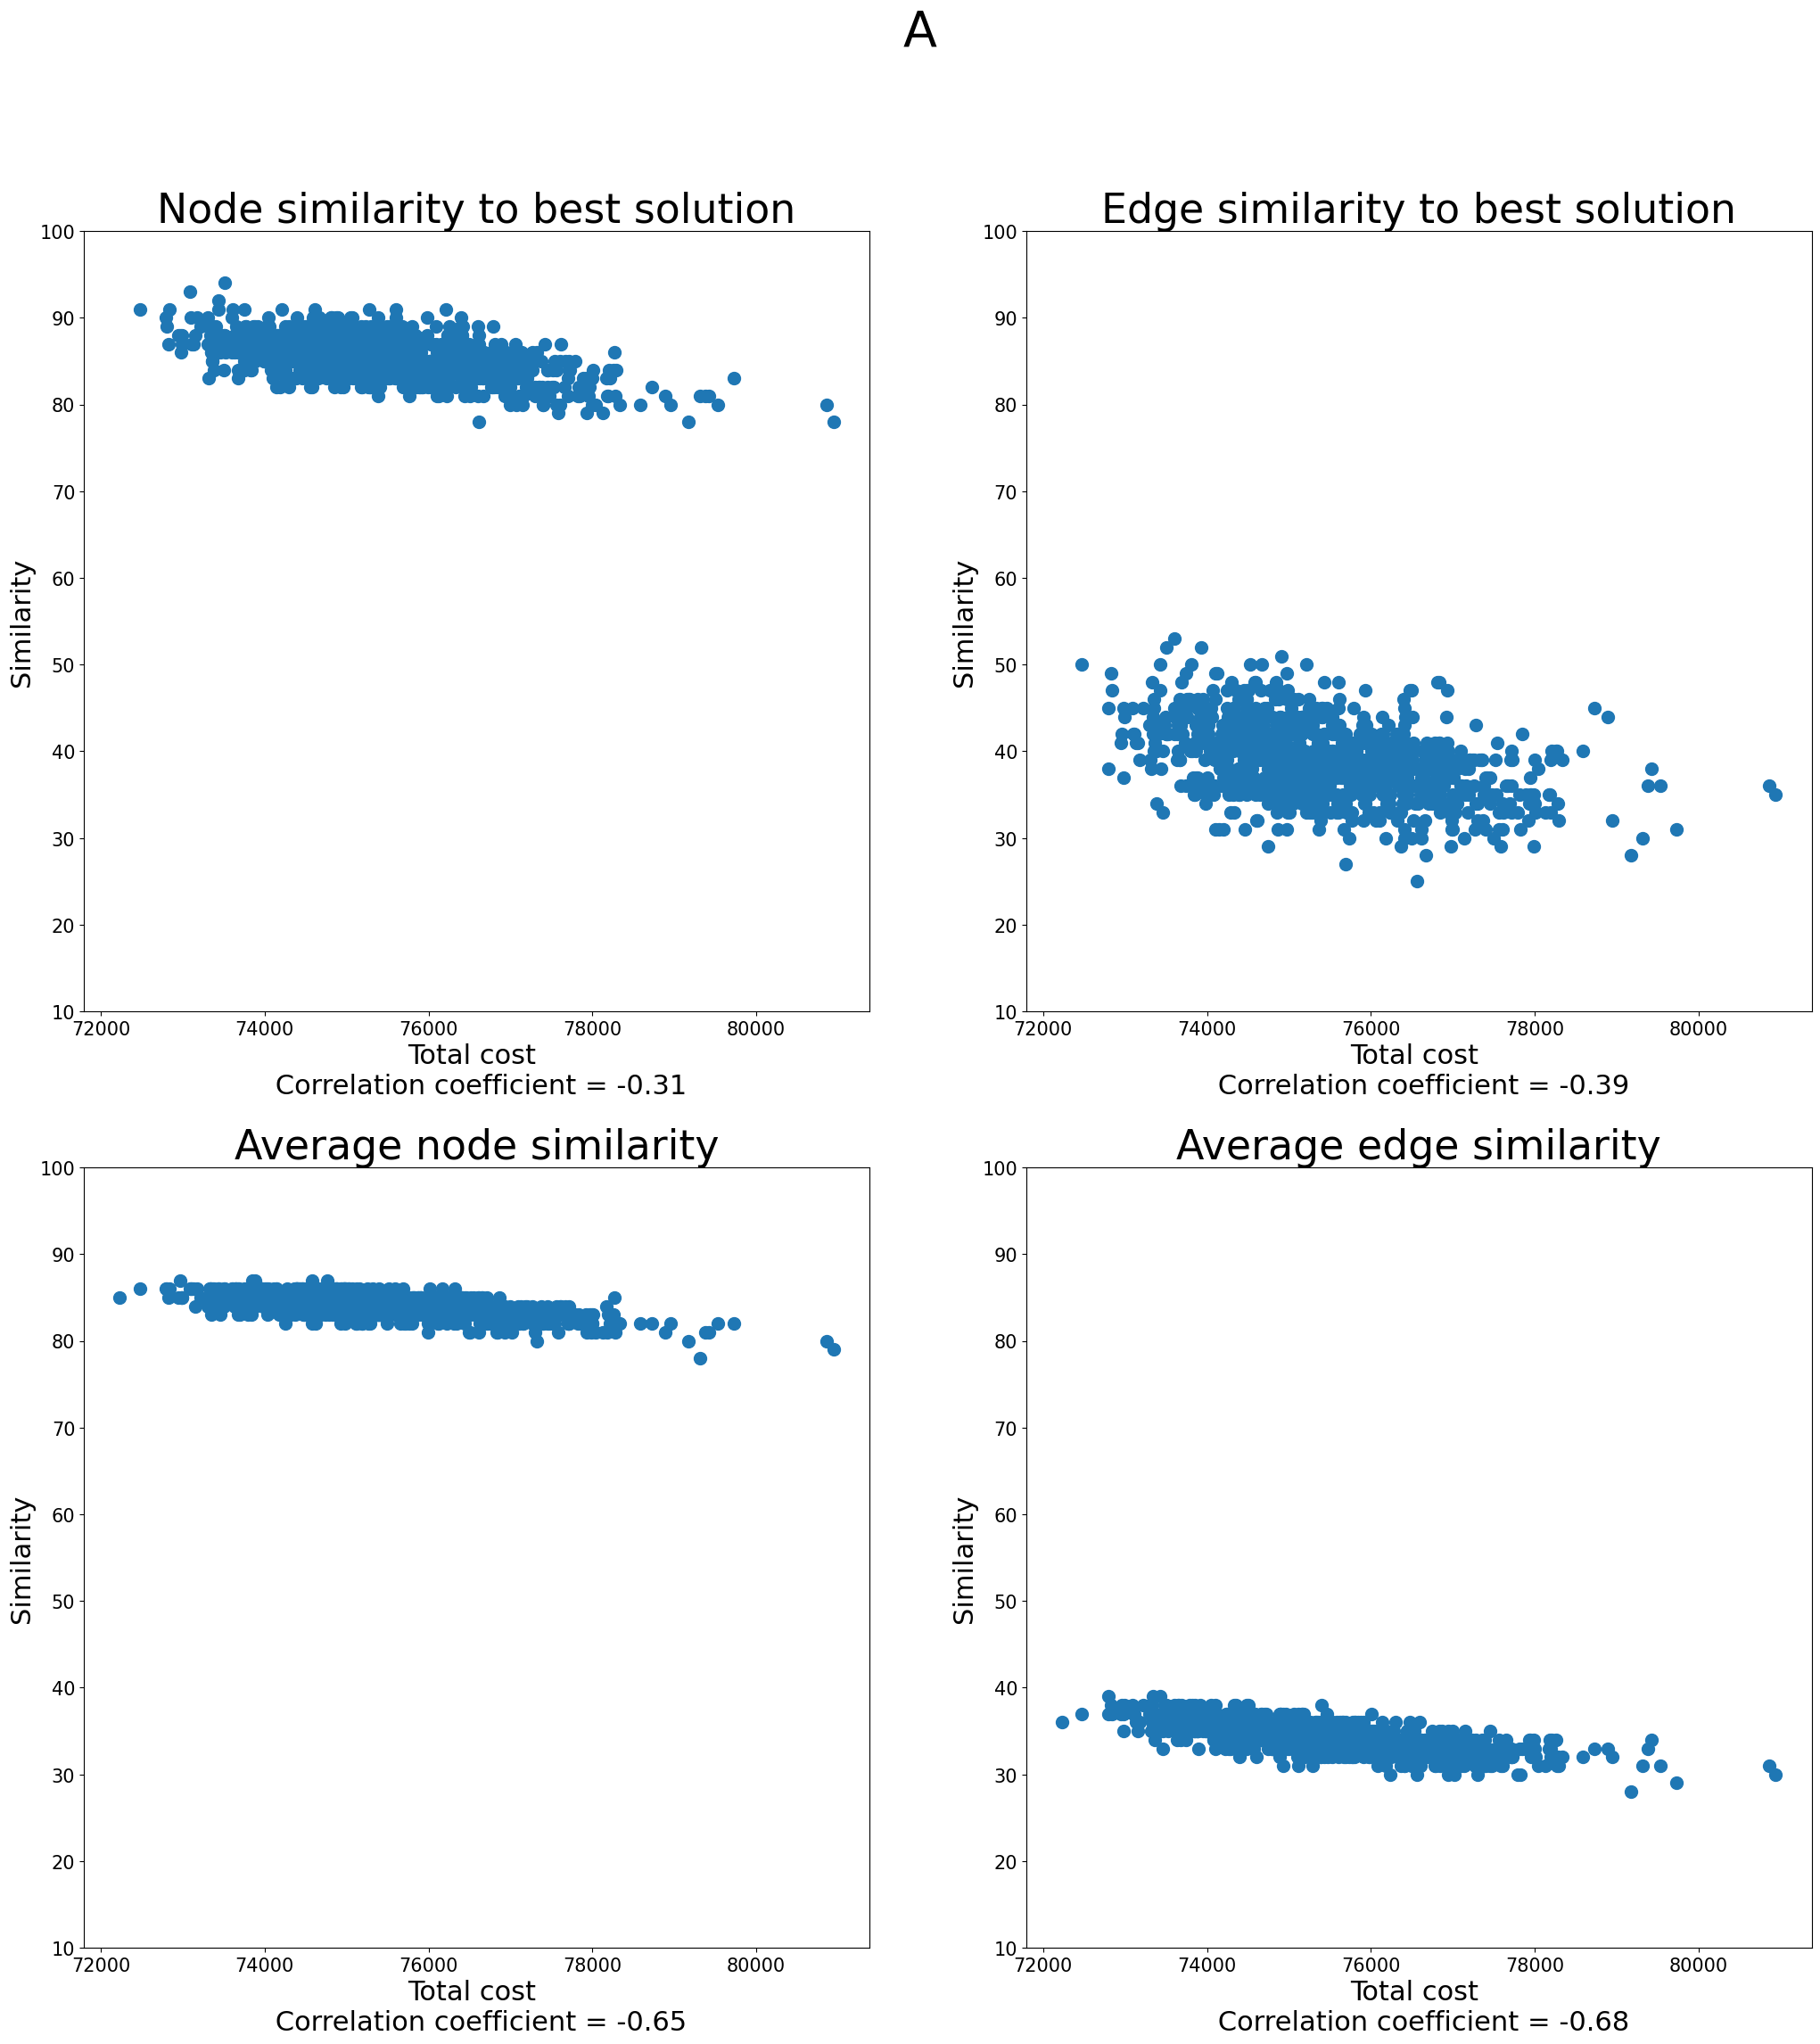

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
ax = ax.flatten()
idx = 0
fig.suptitle("A", fontsize=40)

x = list(a_df.items())[0][1]
titles = ["Node similarity to best solution", "Edge similarity to best solution", "Average node similarity", "Average edge similarity"]
for sub_title, y in list(a_df.items())[1:]:
    ax[idx].scatter(x, y, s=100)
    corr = correlation_coefficient(x, y)
    
    ax[idx].set_title(titles[idx], fontsize=33)
    
    ax[idx].set_xlabel(f'Total cost \n Correlation coefficient = {corr}', fontsize=22)
    ax[idx].set_ylabel('Similarity', fontsize=22)
    
    ax[idx].tick_params(axis='both', labelsize=15)
    ax[idx].set_ylim(10, 100)

    idx += 1
plt.show

In [26]:
b_data[0] = b_data[0].str.replace('[', '').replace("'", '')
b_data[100] = b_data[100].str.replace(']', '').replace("'", '').replace(' ', '')

In [27]:
best = a_data.values[b_data[0].idxmin()]
best_val = int(best[0])
best_nodes = list(best[1:])
best_val

78200

In [28]:
b_sum = []
for i in a_data.values:
    line = [int(i[0])]
    if int(i[0])==78200:
        line.append(0)
        line.append(0)
    else:
        line.append(len(list(set(i[1:]).intersection(best_nodes))))
        morphed1 = [(i[a], i[a+1]) for a in range(1, 99)]
        morphed1.append((i[100], i[1]))
        morphed2 = [(best_nodes[a], best_nodes[a+1]) for a in range(0, 98)]
        morphed2.append((best_nodes[99], best_nodes[0]))
        ful_sum = len(list(set(morphed1).intersection(morphed2)))
        morphed3 = [(i[a+1], i[a]) for a in range(1, 99)]
        morphed3.append((i[1], i[100]))
        ful_sum+= len(list(set(morphed3).intersection(morphed2)))
        line.append(ful_sum)
    sim_nodes = []
    sim_edges = []
    for j in a_data.values:
        if np.all(i!=j):
            sim_nodes.append(len(list(set(i[1:]).intersection(j[1:]))))
            morphed2 = [(j[a], j[a+1]) for a in range(1, 99)]
            morphed2.append((j[100], j[1]))
            part_sum = len(list(set(morphed1).intersection(morphed2))) + len(list(set(morphed3).intersection(morphed2)))
            sim_edges.append(part_sum)
    
    line.append(round(statistics.mean(sim_nodes)))
    line.append(round(statistics.mean(sim_edges)))
    b_sum.append(line)

In [30]:
b_df = pd.DataFrame(b_sum)

<function matplotlib.pyplot.show(close=None, block=None)>

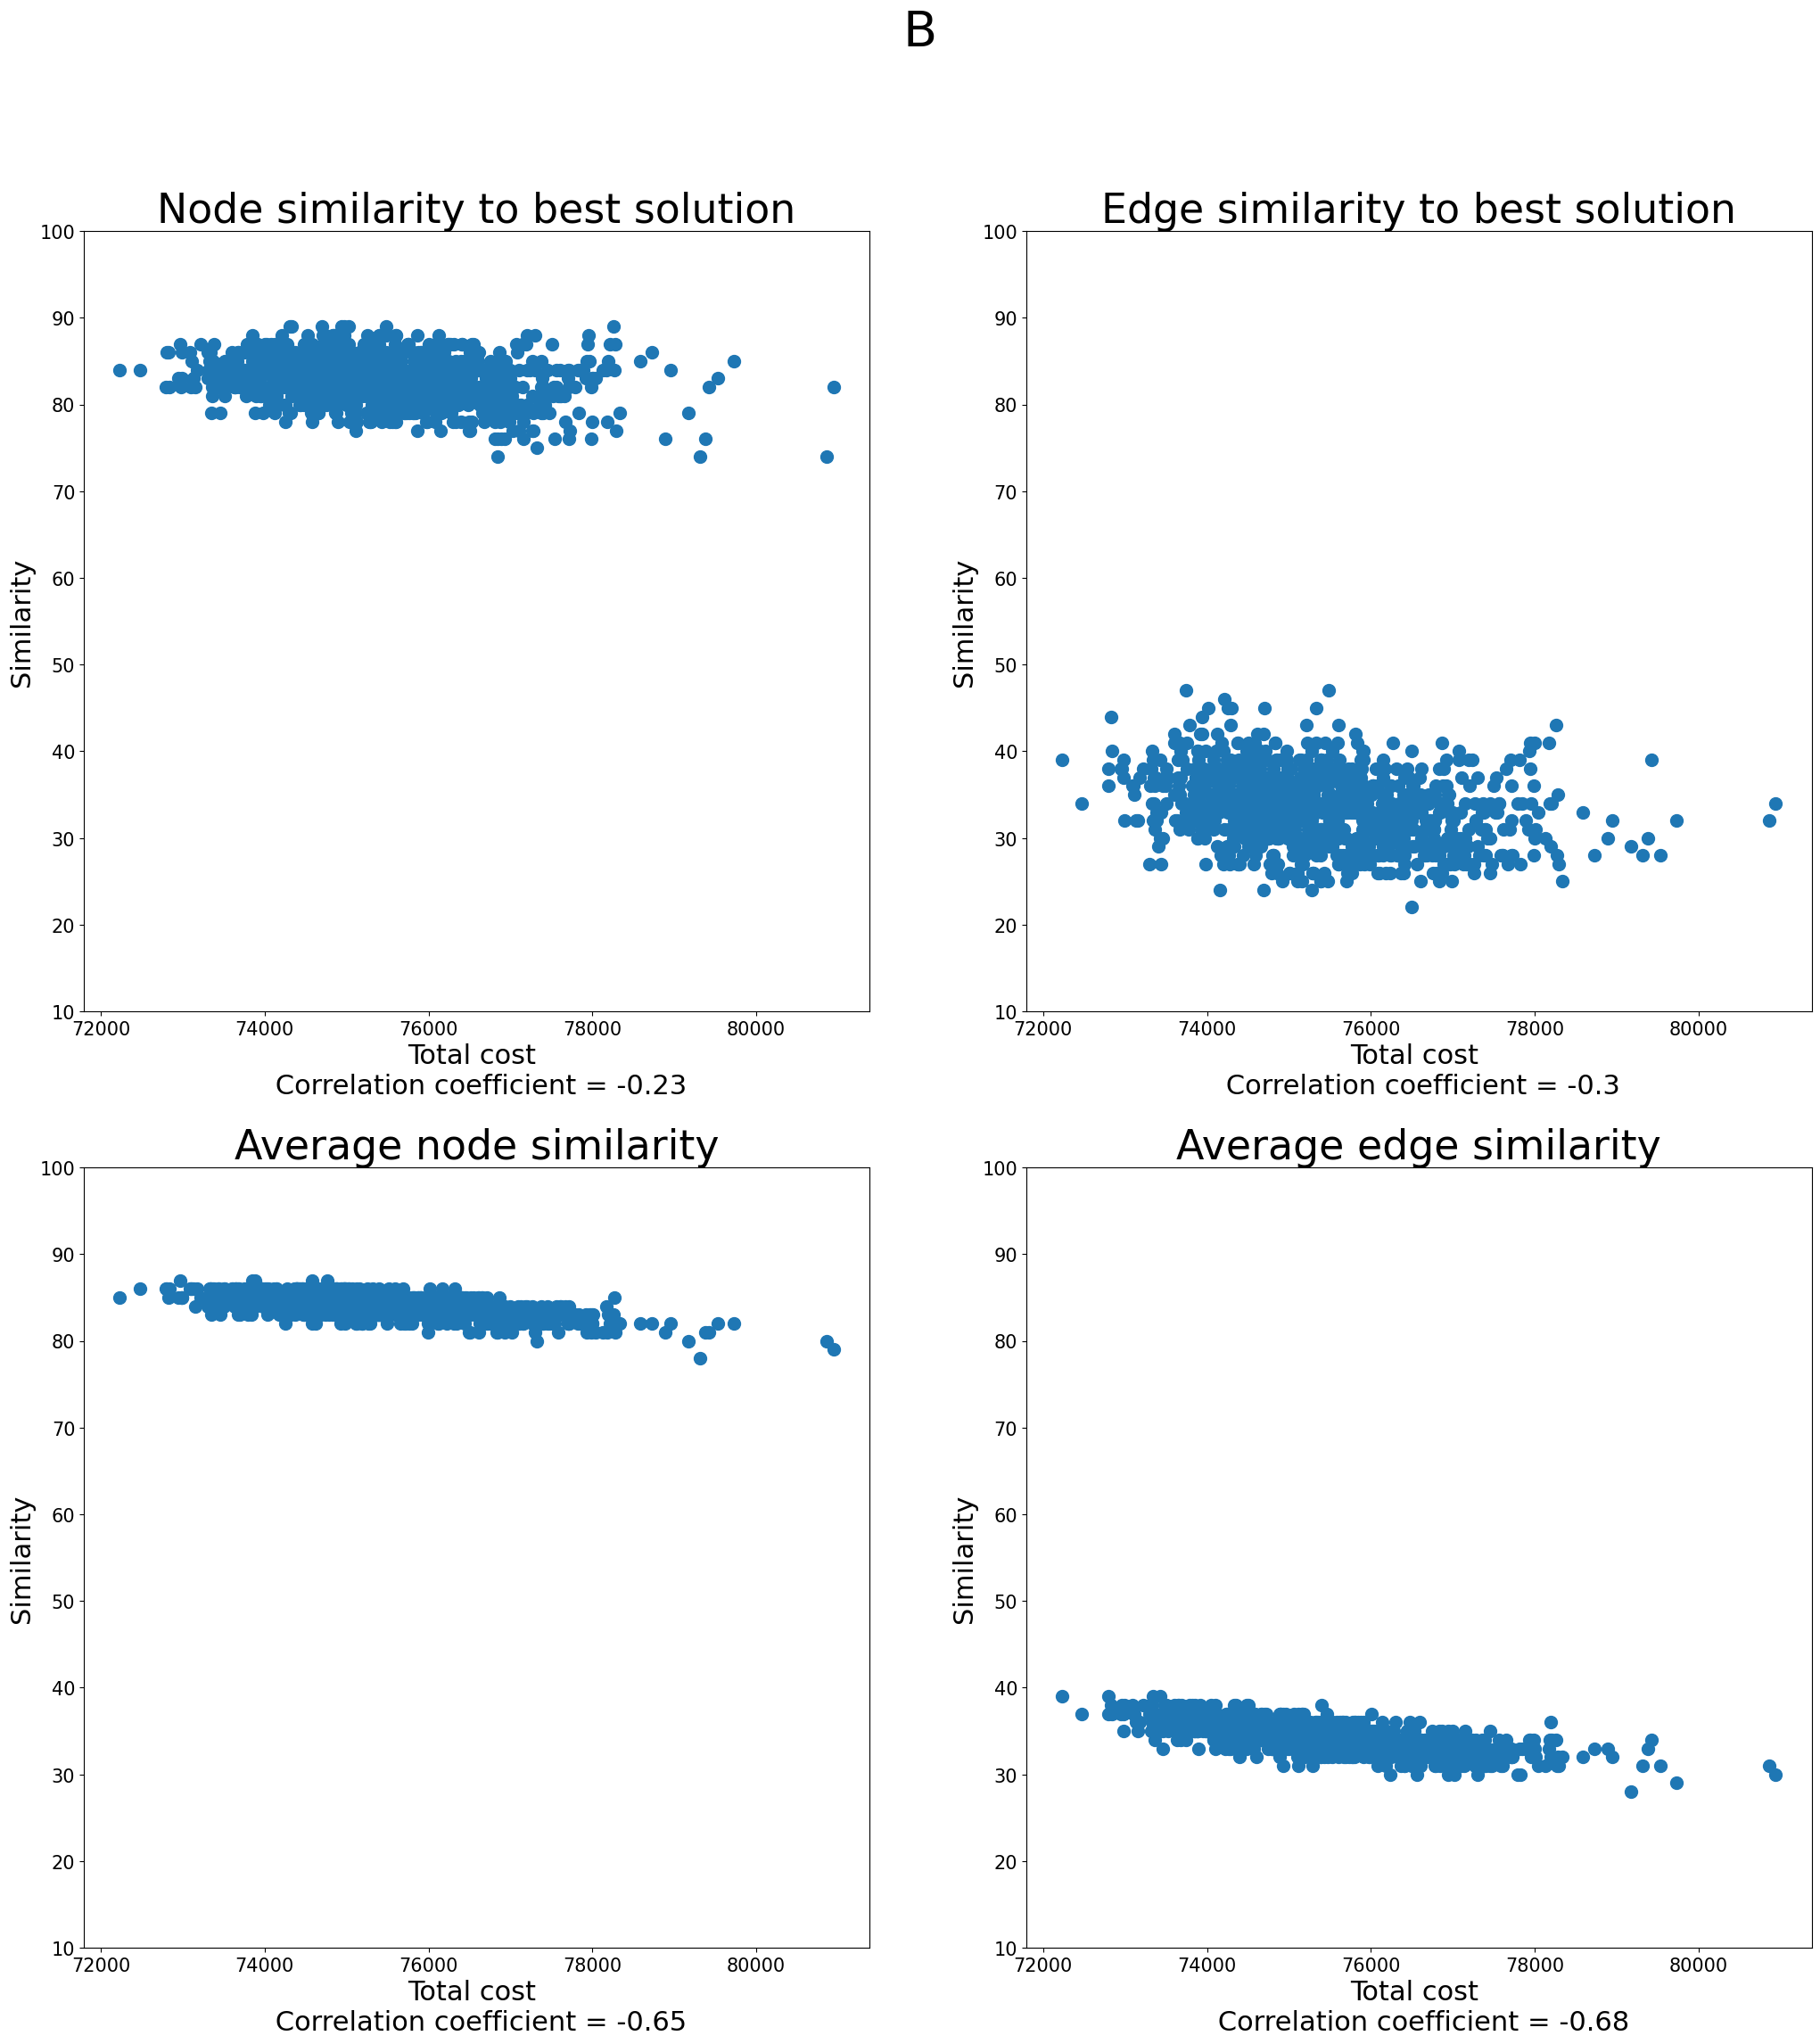

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
ax = ax.flatten()
idx = 0
fig.suptitle("B", fontsize=40)

x = list(b_df.items())[0][1]
titles = ["Node similarity to best solution", "Edge similarity to best solution", "Average node similarity", "Average edge similarity"]
for sub_title, y in list(b_df.items())[1:]:
    ax[idx].scatter(x, y, s=100)
    corr = correlation_coefficient(x, y)
    
    ax[idx].set_title(titles[idx], fontsize=33)
    
    ax[idx].set_xlabel(f'Total cost \n Correlation coefficient = {corr}', fontsize=22)
    ax[idx].set_ylabel('Similarity', fontsize=22)
    
    ax[idx].tick_params(axis='both', labelsize=15)
    ax[idx].set_ylim(10, 100)

    idx += 1
plt.show